In [6]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from numpy import sign

In [35]:
def sat(x, delta):
    if abs(x) >= delta:
        return sign(x)
    else:
        return x/delta
    
def bangbang(e1, e2, r, delta):
    u = -r*sat(e1+e2*abs(e2)/(2*r), delta)
    return u

系统模型
$$
\begin{cases}
    x = x_1 \\
    \dot x_1 = x_2 \\ 
    \dot x_2 = u_0 \\
    -r \leq u_0 \leq r (r>0)
\end{cases}
\tag{1} $$

$$
\begin{cases}
    e_1 = x_1 - x_d\\
    \dot e_1 = e_2 \\ 
    \dot e_2 = u_0 \\
    -r \leq u_0 \leq r (r>0)
\end{cases}
\tag{1 bis} $$

控制模型：Bang-Bang控制
$$
u_0 = -rsat(e_1 + \frac{e_2 |e_2|}{2r}, \delta)，\\
sat(e,\delta)= 
\begin{cases}
    sign(e), &|e| > \delta \\
    e/\delta , &|e| \leq \delta
\end{cases}
\tag{2}
$$


仿真


In [36]:
class Model():  # 离散化模型
    Ts = 0.01
    A_c = np.array([[0,1],[0,0]])
    B_c = np.array([[0],[1]])
    C_c = np.eye(2)
    D_c = np.zeros((2,1))
    A, B, C, D, Ts = signal.cont2discrete((A_c,B_c,C_c,D_c), Ts, method='zoh')  # 离散化
    x = np.array([[0],[0]])

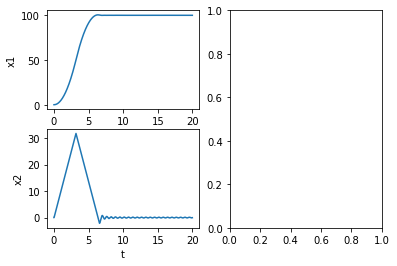

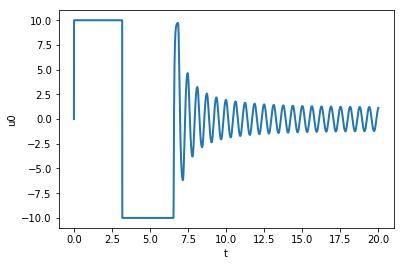

In [113]:
# 开始迭代仿真
model = Model()
r = 10 # 最大最小控制量
delta = 0.1
x_d = 100 # 最终镇定目标
x_0 = 0 # 起始位置
t_range = 20

# 起始位置和控制量
u_0 = 0
model.x = np.array([[0],[0]])

# 记录数据
x_history = model.x
u_history = np.array([0])
t_history = np.array([0])

for ct in range(int(t_range/model.Ts)):
    # 控制量输入
    model.x = model.A @ model.x + model.B * u_0
    x_history = np.append(x_history, model.x, axis = 1)
    t_history = np.append(t_history, t_history[-1]+model.Ts)
    
    # 传感器反馈：x1 和 x2
    e1 = float(model.x[0]) - x_d
    e2 = float(model.x[1])
    
    
    # 控制器输入
    u_0 = bangbang(e1, e2, r, delta)
    u_history = np.append(u_history,u_0)
    
    

# 绘制
# x1, x2
plt.figure(1)
ax1 = plt.subplot(211)
ax1.plot(t_history, x_history[0,:])
ax1.set_ylabel("x1")
ax2 = plt.subplot(212)
ax2.plot(t_history, x_history[1,:])
ax2.set_ylabel("x2")
ax2.set_xlabel("t")
plt.savefig("./asset/状态变量-基础设置.jpg")
plt.show()


# u_0
plt.figure(2)
plt.plot(t_history, u_history, linewidth=2.0)
plt.ylabel("u0")
plt.xlabel("t")
plt.savefig("./asset/控制输入-基础设置.png")
plt.show()

改变不同的r

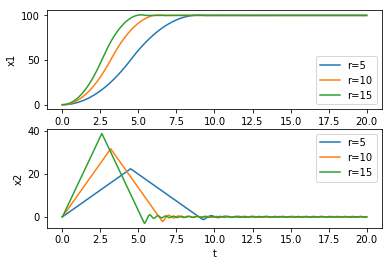

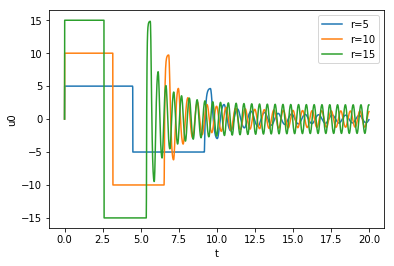

In [112]:
X_history = []
T_history = []
U_history = []
r_list = np.array([5,10,15])
for ite in range(3):
    # 开始迭代仿真
    model = Model()
    r = r_list[ite] # 最大最小控制量
    delta = 0.1
    x_d = 100 # 最终镇定目标
    x_0 = 0 # 起始位置
    t_range = 20

    # 起始位置和控制量
    u_0 = 0
    model.x = np.array([[0],[0]])

    # 记录数据
    x_history = model.x
    u_history = np.array([0])
    t_history = np.array([0])

    for ct in range(int(t_range/model.Ts)):
        # 控制量输入
        model.x = model.A @ model.x + model.B * u_0
        x_history = np.append(x_history, model.x, axis = 1)
        t_history = np.append(t_history, t_history[-1]+model.Ts)

        # 传感器反馈：x1 和 x2
        e1 = float(model.x[0]) - x_d
        e2 = float(model.x[1])


        # 控制器输入
        u_0 = bangbang(e1, e2, r, delta)
        u_history = np.append(u_history,u_0)
        
    X_history.append(x_history)
    T_history.append(t_history)
    U_history.append(u_history)

# 绘制
# x1, x2
plt.figure(1)
ax1 = plt.subplot(211)
ax1.plot(T_history[0], X_history[0][0,:], label = "r=5")
ax1.plot(T_history[1], X_history[1][0,:], label = "r=10")
ax1.plot(T_history[2], X_history[2][0,:], label = "r=15")
ax1.set_ylabel("x1")
ax1.legend()
ax2 = plt.subplot(212)
ax2.plot(T_history[0], X_history[0][1,:], label = "r=5")
ax2.plot(T_history[1], X_history[1][1,:], label = "r=10")
ax2.plot(T_history[2], X_history[2][1,:], label = "r=15")
ax2.set_ylabel("x2")
ax2.set_xlabel("t")
ax2.legend()
plt.savefig("./asset/状态变量-r变.jpg")
plt.show()


# u_0
fig, ax = plt.subplots()
ax.plot(T_history[0], U_history[0], label = "r=5")
ax.plot(T_history[1], U_history[1], label = "r=10")
ax.plot(T_history[2], U_history[2], label = "r=15")
ax.set_ylabel("u0")
ax.set_xlabel("t")
ax.legend()
plt.savefig("./asset/控制输入-r变.jpg")
plt.show()